## One of the aspects seattle is most notable for is its rains.
## We have data from January 1,1948 to December 12,2017 and this dataset provides full records of Seattles daily rainfall patterns.
## We will build a predictive model to detect the possibility of rains on a given day.

#### Data Dictionary:
* date: The date when the observation was recorded
* PRCP: The amount of precipitation in inches
* Max: The maximum temperature for that day
* Tmin: The minimum temperature for that day
* RAIN: True if rains,False if it doesnt rain

In [3]:
#### importing the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
###load the data:
data=pd.read_csv('seattleweather1948-2017.csv')
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [6]:
data.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [7]:
data[data['PRCP'].isna()]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [8]:
data[data['RAIN'].isna()]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [9]:
data.dropna(inplace=True)

In [10]:
data.isna().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
data['RAIN']=le.fit_transform(data['RAIN'])

In [13]:
data.RAIN.dtypes

dtype('int32')

In [14]:
data.describe()

,PRCP,TMAX,TMIN,RAIN
count,25548.000000,25548.000000,25548.000000,25548.000000
mean,0.106222,59.543056,44.513387,0.426648
std,0.239031,12.773265,8.893019,0.494600
min,0.000000,4.000000,0.000000,0.000000
25%,0.000000,50.000000,38.000000,0.000000
50%,0.000000,58.000000,45.000000,0.000000
75%,0.100000,69.000000,52.000000,1.000000
max,5.020000,103.000000,71.000000,1.000000


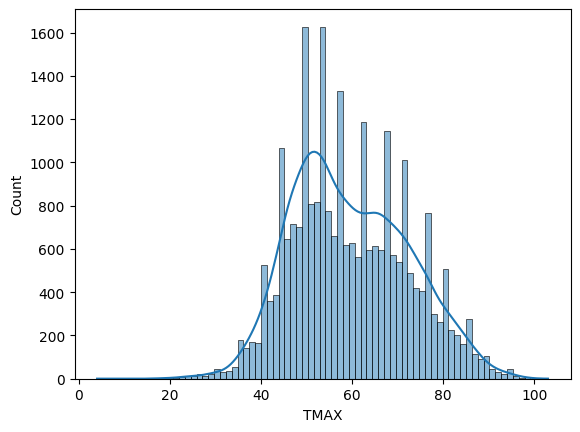

In [15]:
####Univariate analysis:
sns.histplot(data['TMAX'],kde=True)
plt.show()

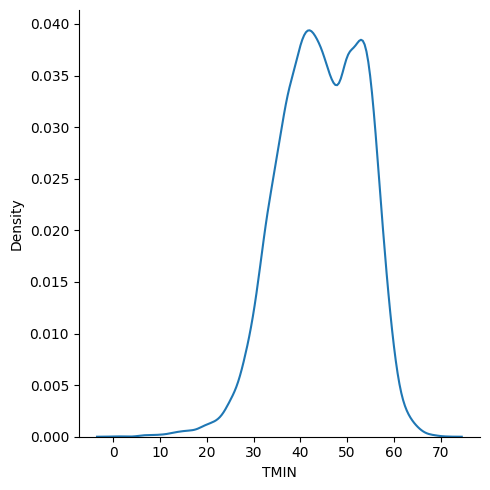

In [16]:
sns.displot(data['TMIN'],kind='kde')
plt.show()

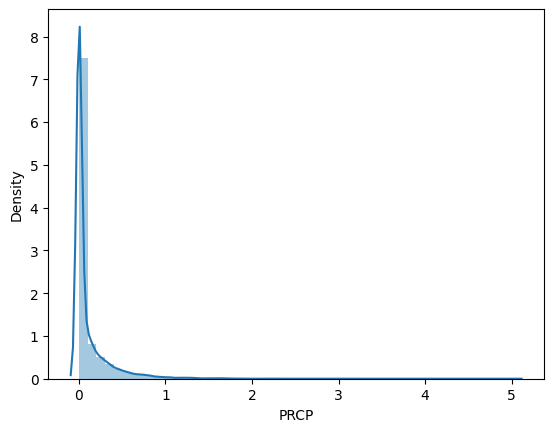

In [17]:
sns.distplot(data['PRCP'])
plt.show()

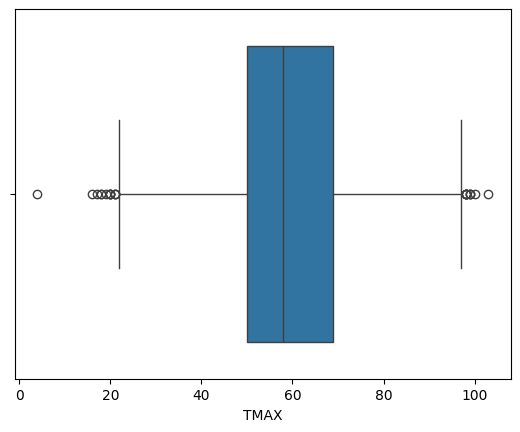

In [18]:
sns.boxplot(x=data['TMAX'])
plt.show()

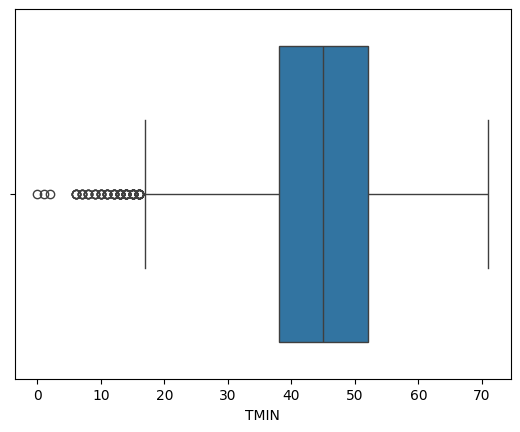

In [19]:
sns.boxplot(x=data['TMIN'])
plt.show()

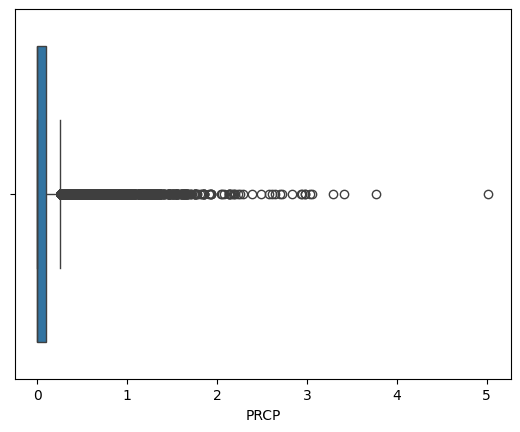

In [20]:
sns.boxplot(x=data['PRCP'])
plt.show()

In [21]:
####outlier removal:
data.drop(data[(data['TMAX']>97)|(data['TMAX']<22)].index,inplace=True)

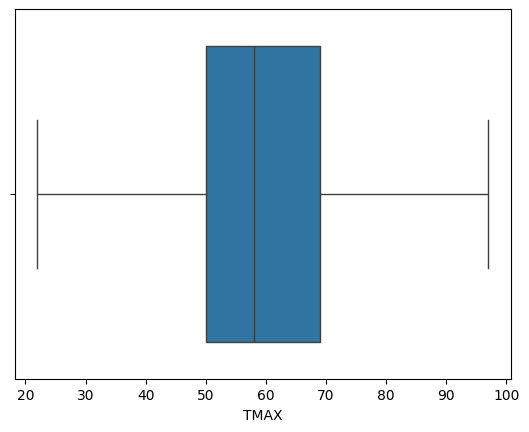

In [22]:
sns.boxplot(x=data['TMAX'])
plt.show()

In [23]:
data.drop(data[data['TMIN']<17].index,inplace=True)

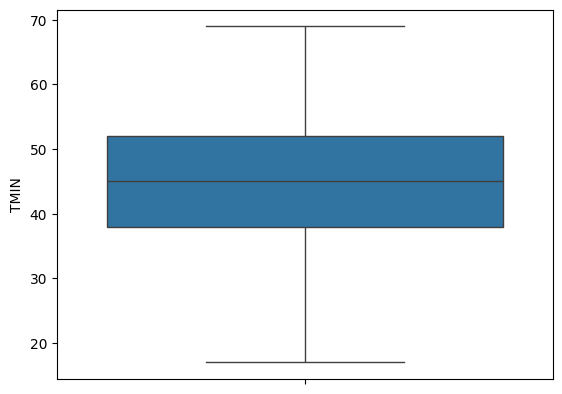

In [24]:
sns.boxplot(data['TMIN'])
plt.show()

In [25]:
#data.drop(data[data['PRCP']>1.8].index,inplace=True)
data.drop(data[data['PRCP']>0.2].index,inplace=True)

In [27]:
data.shape

(21207, 5)

In [28]:
X=data.drop(['RAIN','DATE'],axis=1)
y=data['RAIN']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80,random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [31]:
####fit the training data:
lr.fit(X_train,y_train)

LogisticRegression()

In [32]:
pred=lr.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,pred)
accuracy

0.9104196133899104

In [34]:
lr.predict_proba(X_test)

array([[0.81778707, 0.18221293],
       [0.14100816, 0.85899184],
       [0.61685788, 0.38314212],
       ...,
       [0.90570976, 0.09429024],
       [0.07830964, 0.92169036],
       [0.74538884, 0.25461116]])

In [35]:
#### the first column gives us the probabilty of failure(no rain) and the second column gives us the probability of a success
###(rain)

In [36]:
pred

array([0, 1, 0, ..., 0, 1, 0])

In [37]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
cm

array([[2912,   13],
       [ 367,  950]], dtype=int64)

In [38]:
2912+950

3862

In [39]:
####3862 are the correct classifications by the model.367 is the FN or type II error,and 13 is the FP or type 1 error.

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2925
           1       0.99      0.72      0.83      1317

    accuracy                           0.91      4242
   macro avg       0.94      0.86      0.89      4242
weighted avg       0.92      0.91      0.91      4242



In [41]:
###predict for new data:
x_new=[[1.2,45,20]]
pred_new=lr.predict(x_new)
pred_new

array([1])